*The Extinction Status of Psittaciformes*
================
**This file analyzes the Extinction Status of the order of Psittaciformes (Parrots)**


Research Question:

Investigate if there's a correlation between the physical characteristics of bird species, their natural environments, and their conservation status.

What roles do geographical locations play in the conservation status of bird species?

What roles do geographical locations play in the morphological traits of bird species?

Is there is a relationship between morphological traits and conservation status of bird species?

In [19]:
pip install geopandas matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd


In [21]:
df = pd.read_csv('../dataset/Psittaciformes.csv',
                 on_bad_lines='skip',
                 encoding='utf-8',
                 dtype=str,  # Read all as string first
                 skip_blank_lines=True,
                 header=0,
                 skipinitialspace=True)

In [22]:
print(df.columns)

Index(['scientificName', 'kingdomName', 'phylumName', 'className', 'orderName',
       'familyName', 'genusName', 'speciesName', 'redlistCategory',
       'redlistCriteria', 'yearPublished', 'assessmentDate', 'criteriaVersion',
       'language', 'populationTrend', 'systems', 'realm', 'yearLastSeen',
       'possiblyExtinct', 'possiblyExtinctInTheWild', 'scopes', 'Sequence',
       'Avibase.ID1', 'Total.individuals', 'Female', 'Male', 'Unknown',
       'Complete.measures', 'Beak.Length_Culmen', 'Beak.Length_Nares',
       'Beak.Width', 'Beak.Depth', 'Tarsus.Length', 'Wing.Length',
       'Kipps.Distance', 'Secondary1', 'Hand-Wing.Index', 'Tail.Length',
       'Mass', 'Mass.Source', 'Mass.Refs.Other', 'Inference',
       'Traits.inferred', 'Reference.species', 'Habitat', 'Habitat.Density',
       'Migration', 'Trophic.Level', 'Trophic.Niche', 'Primary.Lifestyle',
       'Min.Latitude', 'Max.Latitude', 'Centroid.Latitude',
       'Centroid.Longitude', 'Range.Size', 'internalTaxonId_x', '

In [23]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
print(df['redlistCategory'].unique())

['Endangered' 'Least Concern' 'Near Threatened' 'Vulnerable'
 'Critically Endangered' 'Extinct in the Wild']


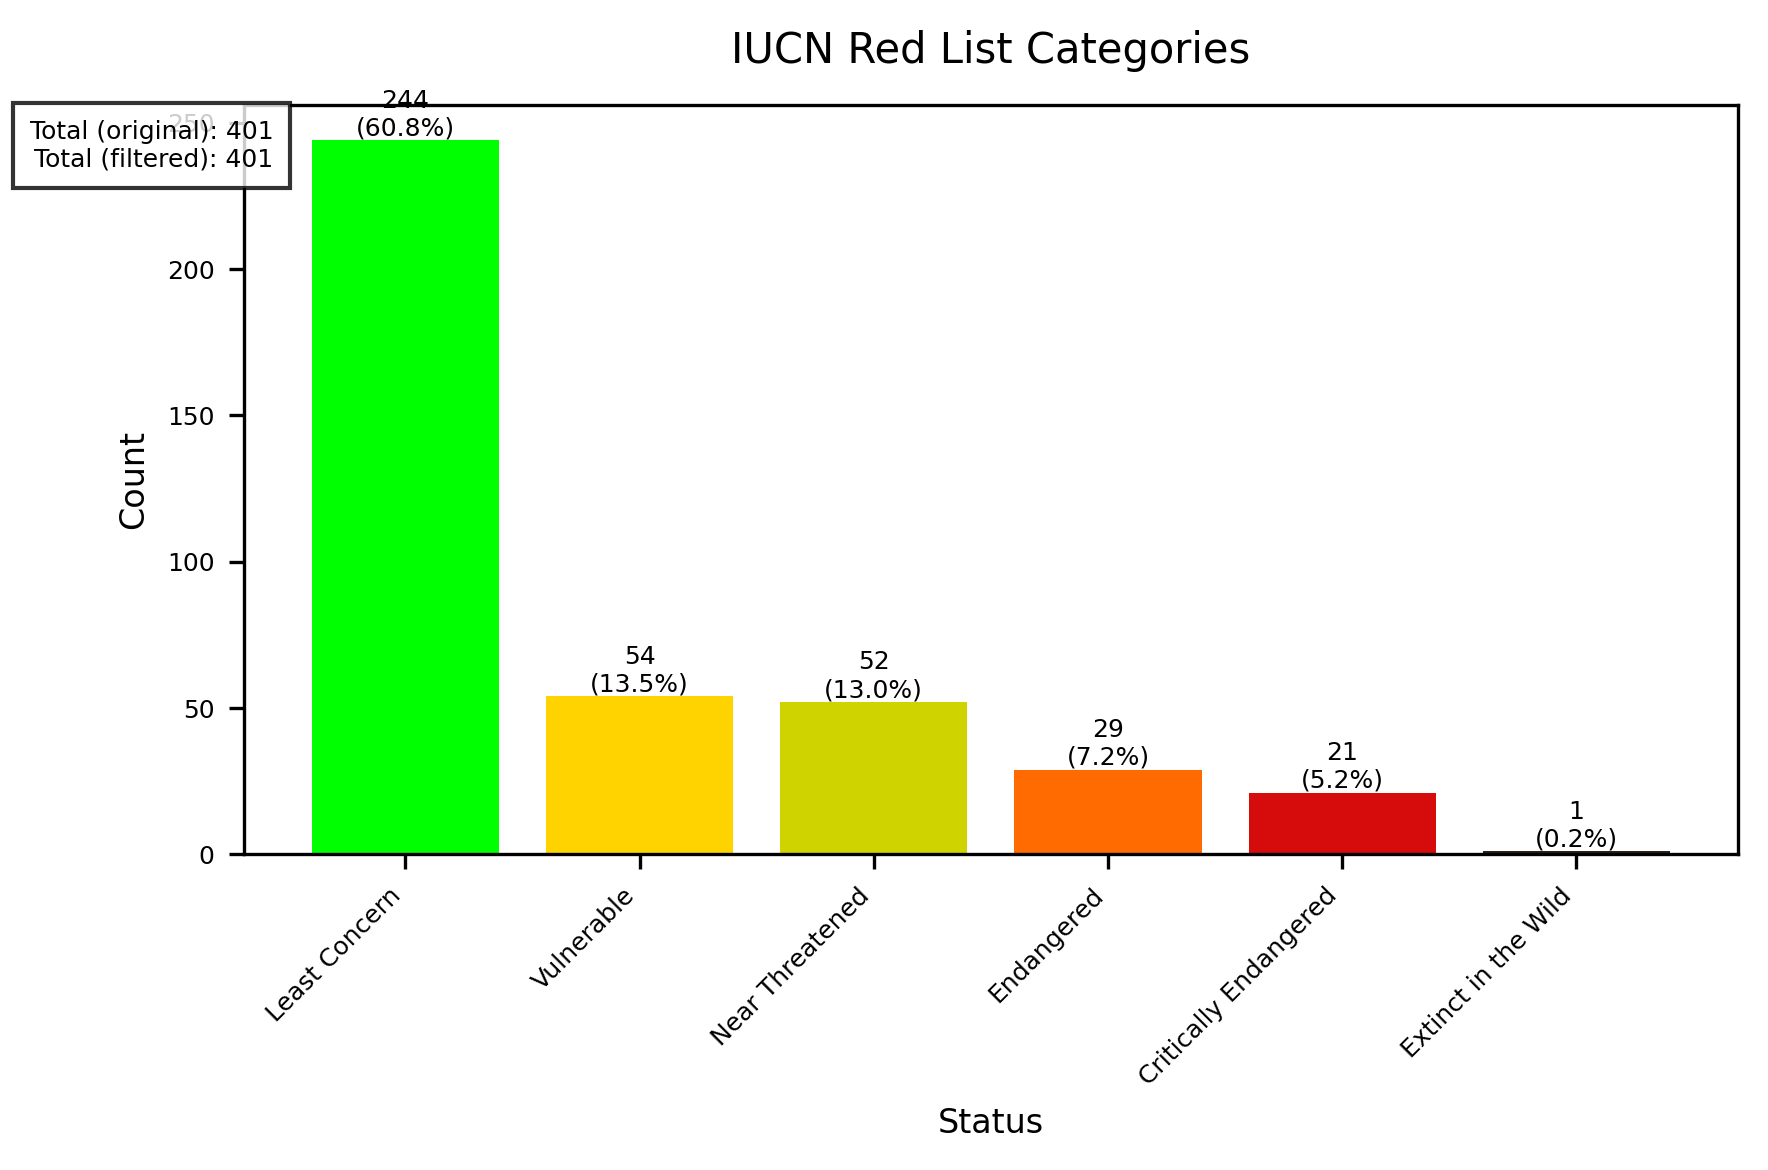

In [24]:
def plot_redlist_distribution(df, figsize=(6, 4), dpi=300):
    """
    Creates a histogram/distribution plot of Red List categories with smaller dimensions
    """
    # Define valid categories and filter
    valid_categories = [
        'Least Concern',
        'Vulnerable',
        'Endangered',
        'Critically Endangered',
        'Extinct in the Wild',
        'Near Threatened',
        'Extinct'
    ]

    df_filtered = df[df['redlistCategory'].isin(valid_categories)]

    # Define IUCN Red List colors
    colors = {
        'Least Concern': '#00FF00',        # Green
        'Vulnerable': '#FFD300',# Yellow
        'Near Threatened': '#CFD300',
        'Endangered': '#FF6B00',           # Orange
        'Critically Endangered': '#D60B0B', # Red
        'Extinct in the Wild': '#2D1F15',  # Dark Brown
        'Extinct': '#000000',              # Black
    }

    # Calculate value counts and percentages
    counts = df_filtered['redlistCategory'].value_counts()
    total_filtered = len(df_filtered)
    total_original = len(df)

    # Create figure with smaller size
    plt.figure(figsize=figsize, dpi=dpi)

    # Create bar plot
    bars = plt.bar(range(len(counts)), counts,
                  color=[colors.get(x, '#808080') for x in counts.index])

    # Customize plot with smaller font sizes
    plt.title('IUCN Red List Categories', pad=10, fontsize=10)
    plt.xlabel('Status', fontsize=8)
    plt.ylabel('Count', fontsize=8)

    # Rotate x-axis labels with smaller font
    plt.xticks(range(len(counts)), counts.index, rotation=45, ha='right', fontsize=6)
    plt.yticks(fontsize=6)

    # Add count labels with smaller font
    for bar in bars:
        height = bar.get_height()
        percentage = (height/total_filtered) * 100
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}\n({percentage:.1f}%)',
                ha='center', va='bottom', fontsize=6)

    # Add both totals to upper right
    plt.text(0.02, 0.98,
             f'Total (original): {total_original:,}\nTotal (filtered): {total_filtered:,}',
             transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8),
             verticalalignment='top',
             horizontalalignment='right',
             fontsize=6)

    plt.tight_layout()

    return plt.gcf()

# Usage:
fig = plot_redlist_distribution(df)
plt.show()


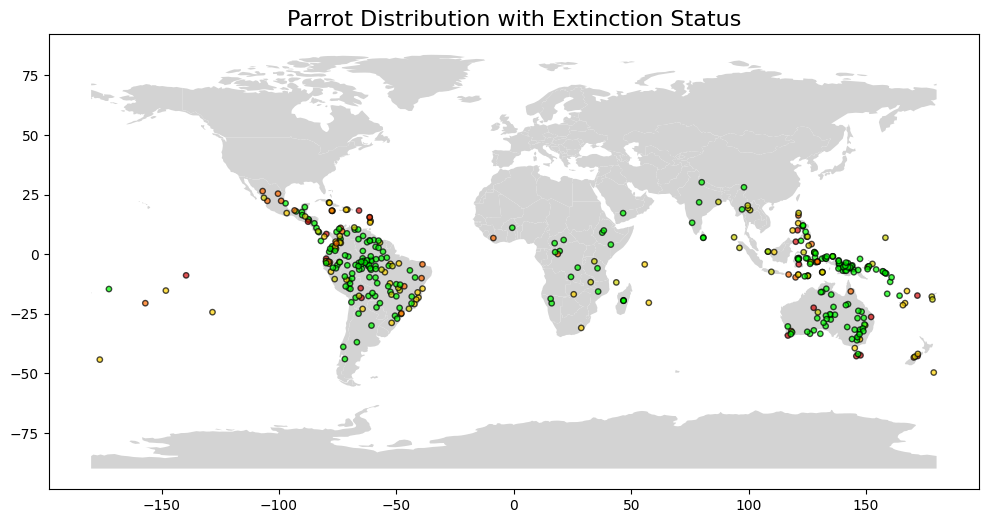

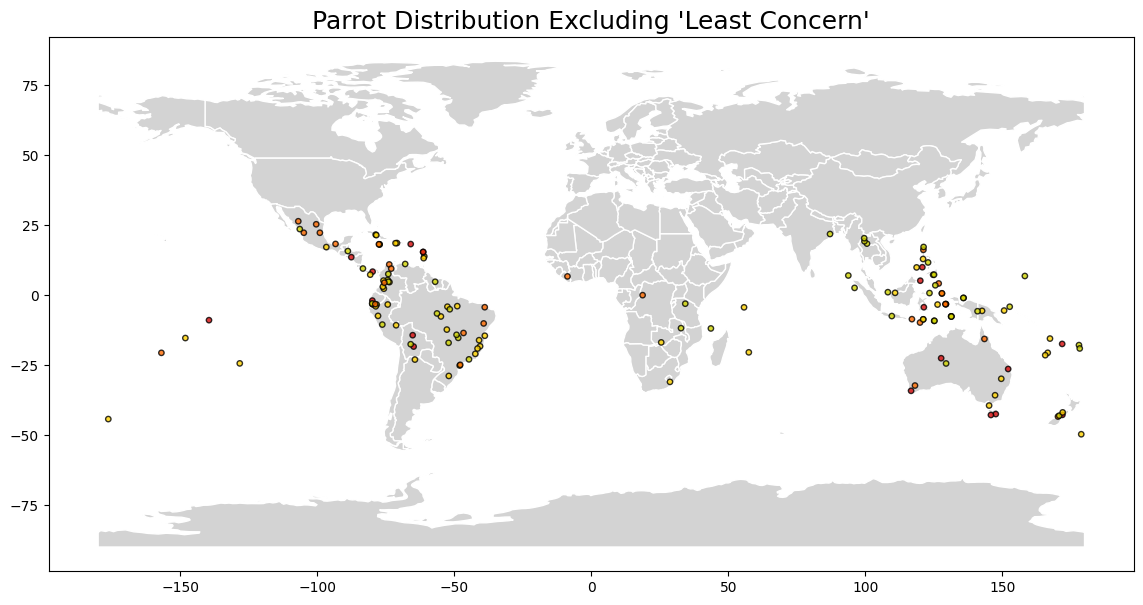

In [25]:
# Replace this path with the location of your downloaded Natural Earth shapefile
world_shapefile_path = "./ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"

# Load the world shapefile
world = gpd.read_file(world_shapefile_path)

# Filter relevant columns for the map
columns_needed = ['scientificName', 'Centroid.Latitude', 'Centroid.Longitude', 'redlistCategory']
map_data = df[columns_needed].dropna()

# Define colors for extinction status
colors = {
    'Least Concern': '#00FF00',        
    'Vulnerable': '#FFD300',          
    'Near Threatened': '#CFD300',
    'Endangered': '#FF6B00',          
    'Critically Endangered': '#D60B0B',
    'Extinct in the Wild': '#2D1F15',  
    'Extinct': '#000000',              
}

# Assign colors based on 'redlistCategory'
map_data['color'] = map_data['redlistCategory'].map(colors)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    map_data, 
    geometry=gpd.points_from_xy(map_data['Centroid.Longitude'], map_data['Centroid.Latitude']),
    crs="EPSG:4326"
)

# Plot the map
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color='lightgrey')

gdf.plot(ax=ax, color=gdf['color'], markersize=15, edgecolor='black', alpha=0.7)

# Add title
plt.title("Parrot Distribution with Extinction Status", fontsize=16)
plt.show()

# Exclude rows where 'redlistCategory' is 'Least Concern'
map_data = map_data[map_data['redlistCategory'] != 'Least Concern']

# Assign colors based on 'redlistCategory'
map_data['color'] = map_data['redlistCategory'].map(colors)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    map_data, 
    geometry=gpd.points_from_xy(map_data['Centroid.Longitude'], map_data['Centroid.Latitude']),
    crs="EPSG:4326"
)

# Plot the map
fig, ax = plt.subplots(figsize=(14, 10))
world.plot(ax=ax, color='lightgrey', edgecolor='white')

gdf.plot(ax=ax, color=gdf['color'], markersize=15, edgecolor='black', alpha=0.8)

# Add title
plt.title("Parrot Distribution Excluding 'Least Concern'", fontsize=18)
plt.show()


In [26]:
categories = {
    'Trade': ['trade'],
    'Habitat Loss': ['habitat', 'loss', 'forest', 'areas'],
    'Climate Change': ['cyclones', 'natural', 'climate'],
    'Diseases': ['avian', 'malaria'],
    'Predation': ['predators'],
    'Human Activity': ['hunting', 'logging', 'agriculture'],
    'Pollution': ['pollution'],
}


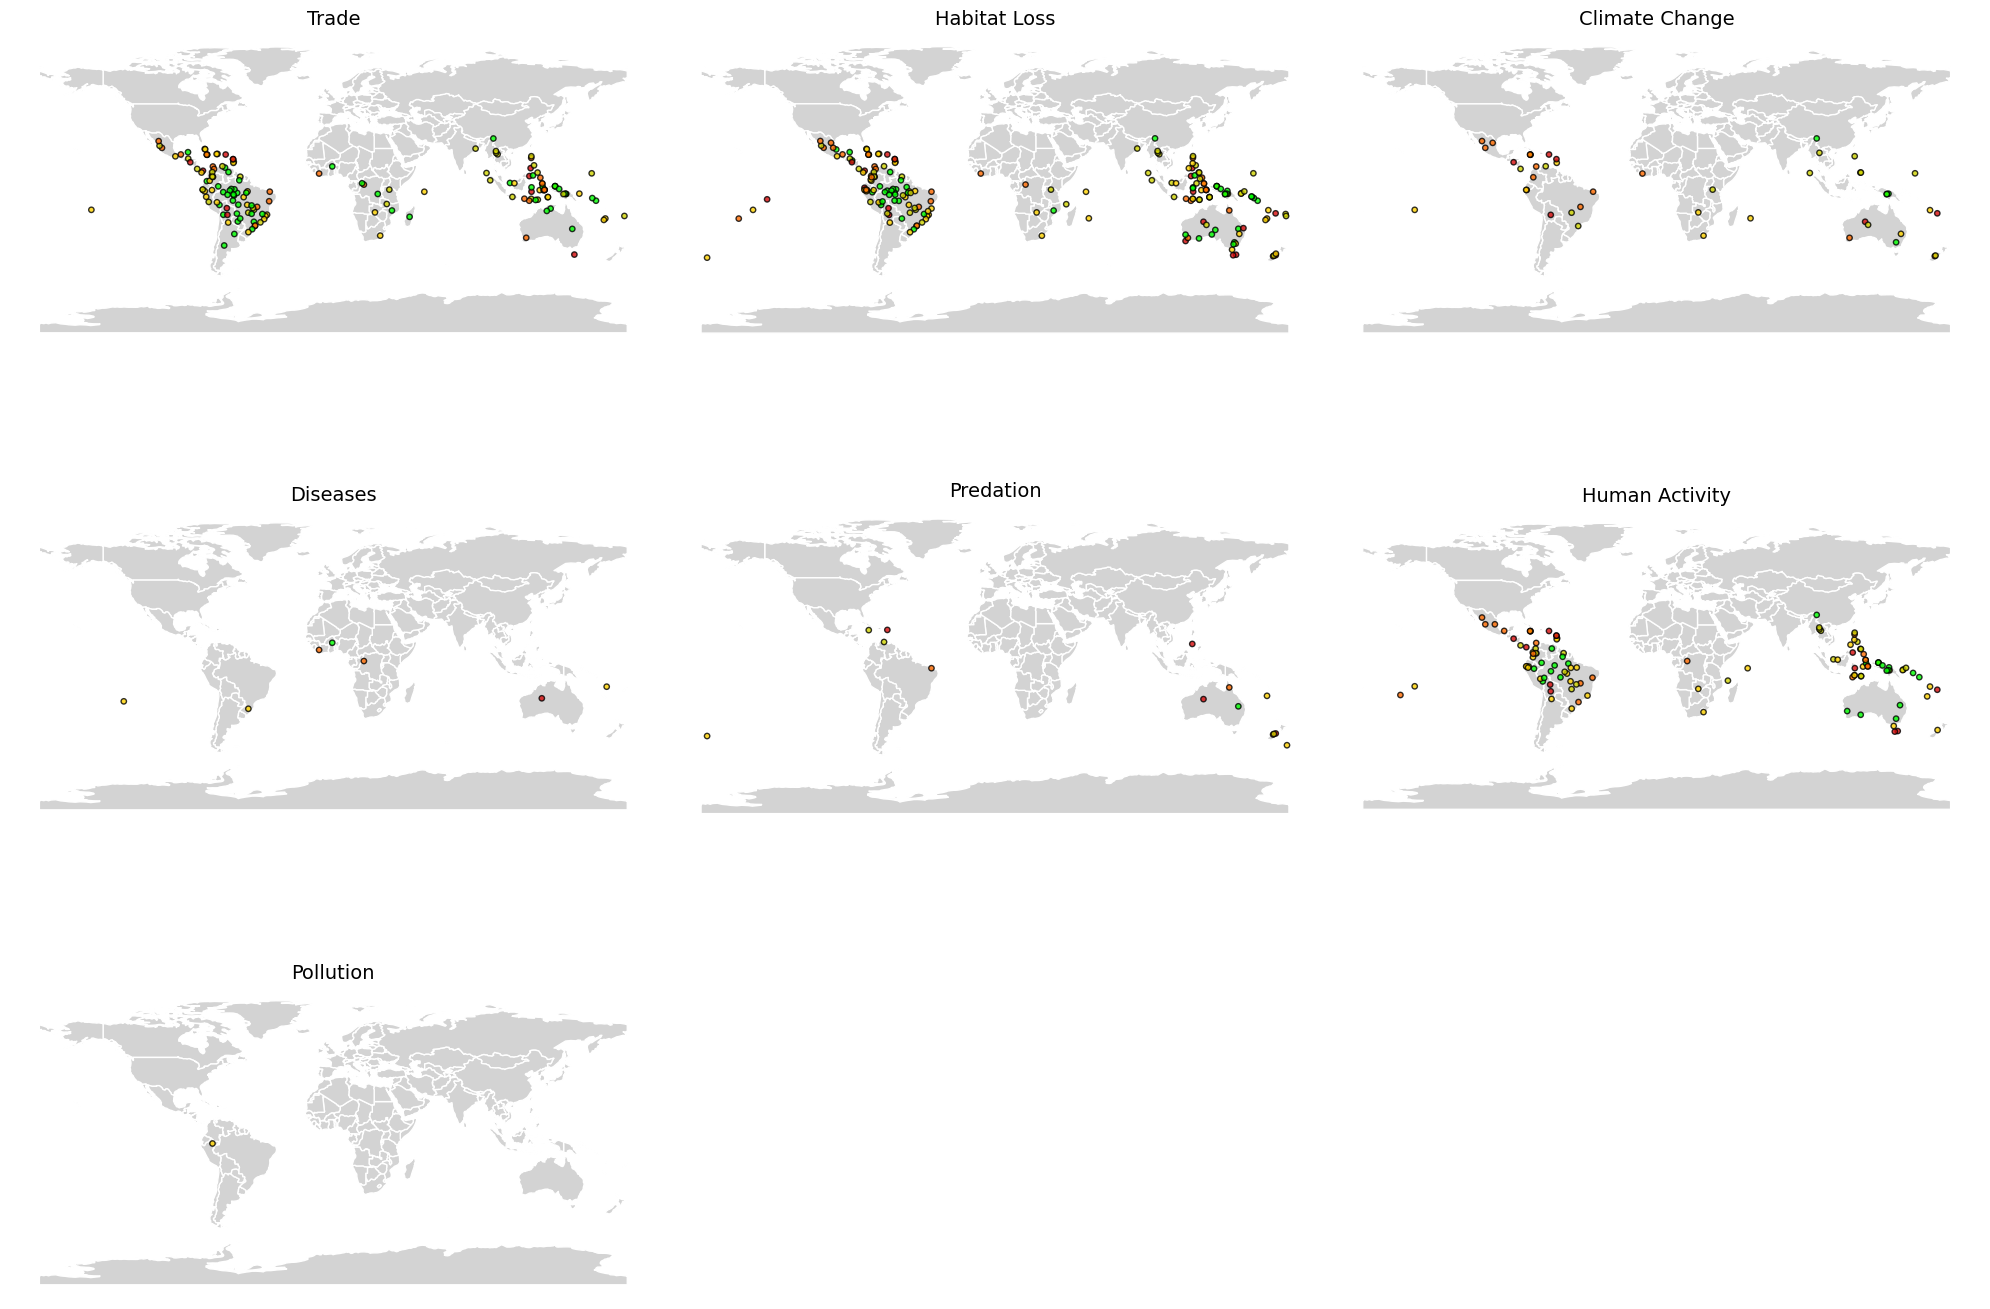

In [27]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Define the categorize_threat function
def categorize_threat(threat, category_keywords):
    return any(keyword in threat.lower() for keyword in category_keywords)

# Categories and their keywords
categories = {
    'Trade': ['trade'],
    'Habitat Loss': ['habitat', 'loss', 'forest', 'areas'],
    'Climate Change': ['cyclones', 'natural', 'climate'],
    'Diseases': ['avian', 'malaria'],
    'Predation': ['predators'],
    'Human Activity': ['hunting', 'logging', 'agriculture'],
    'Pollution': ['pollution'],
}

# Replace with the location of your shapefile
world_shapefile_path = "./ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"

# Load the world shapefile
world = gpd.read_file(world_shapefile_path)

# Sample dataframe (replace with your data)
# df = pd.read_csv('your_data.csv')

# Filter relevant columns for the map
columns_needed = ['scientificName', 'Centroid.Latitude', 'Centroid.Longitude', 'redlistCategory', 'threats']
map_data = df[columns_needed].dropna()

# Define colors for extinction status
colors = {
    'Least Concern': '#00FF00',        
    'Vulnerable': '#FFD300',          
    'Near Threatened': '#CFD300',
    'Endangered': '#FF6B00',          
    'Critically Endangered': '#D60B0B',
    'Extinct in the Wild': '#2D1F15',  
    'Extinct': '#000000',              
}

# Assign colors based on 'redlistCategory'
map_data['color'] = map_data['redlistCategory'].map(colors)

# Initialize plot
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

for i, (category, keywords) in enumerate(categories.items()):
    # Filter data based on threats
    category_data = map_data[map_data['threats'].apply(lambda x: categorize_threat(x, keywords))]

    # Create a GeoDataFrame
    gdf = gpd.GeoDataFrame(
        category_data, 
        geometry=gpd.points_from_xy(category_data['Centroid.Longitude'], category_data['Centroid.Latitude']),
        crs="EPSG:4326"
    )

    # Plot the world map
    ax = axes[i]
    world.plot(ax=ax, color='lightgrey', edgecolor='white')

    # Plot the category data
    gdf.plot(ax=ax, color=gdf['color'], markersize=15, edgecolor='black', alpha=0.8)

    # Add title
    ax.set_title(f"{category}", fontsize=14)
    ax.axis('off')

# Remove unused subplots
for j in range(len(categories), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()